# Road Safety Data for the UK

#### The Data
The [files](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) provide detailed road safety data about the circumstances of personal injury road accidents in GB, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. The files used here span 2013 to 2017.

#### The Task
The purpose of the analysis is 
- To summarize the main characteristics of the data, and obtain interesting facts that are worth highlighting.
- Identity and quantify associations (if any) between the number of causalities (in the Accidents table) and other variables in the data set.
- Explore whether it is possible to predict accident hotspots based on the data.

#### The OSEMiN-approach

The OSEMiN Process is an acronym that rhymes with “awesome” and stands for **Obtain, Scrub, Explore, Model, and iNterpret**. It can be used as a blueprint for working on data problems using machine learning tools. Preprocessing involves scrubbing (also called cleaning) and exploring the data. Building the model, evaluating, and optimizing it make up the process of machine learning.

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Data Wrangling'>2. Data Wrangling</a>

* <a href='#2.1. Converting Datetime Column'>2.1. Converting Datetime Column</a>
* <a href='#2.2. Handling Missing Values'>2.2. Handling Missing Values</a>

### <a href='#3. Exploratory Data Analysis (EDA)'>3. Exploratory Data Analysis (EDA)</a>

* <a href='#3.1. Main Characteristics of Accidents'>3.1. Main Characteristics of Accidents</a>
* <a href='#3.2. Main Characteristics of Casualties'>3.2. Main Characteristics of Casualties</a>
* <a href='#3.3. Main Characteristics of Vehicles'>3.3. Main Characteristics of Vehicles</a>

### <a href='#4. Modeling the Data'>4. Modeling the Data</a>

* <a href='#4.1. Preprocessing the Data'>4.1. Preprocessing the Data</a>
* <a href='#4.2. Random Forest Classifier'>4.2. Random Forest Classifier</a>
* <a href='#4.3. XGBoost Classifier'>4.3. XGBoost Classifier</a>

### <a href='#5. Interpreting the Data'>5. Interpreting the Data</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

[Lookup Table](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)

***Accidents 2013-2017***

*To get some ideas on how to elegantly read in multiple files in pandas, check this [link](https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688).*

In [12]:
# define a quick function to get the shape of a dataframe
def shape_df(df):
    print('Records:', df.shape[0], '\nColumns:', df.shape[1])

In [13]:
accidents = pd.concat([pd.read_csv(f, compression='zip', low_memory=False) \
                       for f in glob.glob('data/*Accidents*.zip')], )
shape_df(accidents)
accidents.head(3)

Records: 691641 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833


In [3]:
#accidents.info()

The combined accidents table that now spans 5 years contains almost 692.000 records and 32 columns, with only very few missing values. <br> If we decided to work with date and/or time, we will need to convert the string values into datetime format. Besides that, almost all data is properly stored as numeric data.

In [4]:
#accidents.iloc[10:14]

In [5]:
#accidents.set_index('Accident_Index').loc['201501BS70014']

***Casualties 2013-2017***

In [6]:
# renaming the index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip', index=False)

In [14]:
casualties = pd.concat([pd.read_csv(f, compression='zip') \
                        for f in glob.glob('data/*Casualties*.zip')], sort=True)
shape_df(casualties)
casualties.head(3)

/anaconda3/envs/geo-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Records: 916713 
Columns: 16


,Accident_Index,Age_Band_of_Casualty,Age_of_Casualty,Bus_or_Coach_Passenger,Car_Passenger,Casualty_Class,Casualty_Home_Area_Type,Casualty_IMD_Decile,Casualty_Reference,Casualty_Severity,Casualty_Type,Pedestrian_Location,Pedestrian_Movement,Pedestrian_Road_Maintenance_Worker,Sex_of_Casualty,Vehicle_Reference
0,201301BS70003,7,NaN,0,0,1,1,NaN,1,2,1,0,0,0,1,2
1,201301BS70005,6,NaN,0,0,1,1,NaN,1,3,3,0,0,0,2,1
2,201301BS70005,4,NaN,0,0,3,1,NaN,2,3,0,1,1,2,2,1


In [16]:
#casualties.info()

The combined casualties table has roughly 917,000 with 16 columns providing detailed information about the casualties. The data is almost complete, with missing values only in the `age_of_casualty` and `Casualty_IMD_Decile` columns. Apart from the index, all data is stored in a numeric format.

***Vehicles 2013-2017***

In [17]:
# renaming the index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip', index=False)

In [18]:
vehicles = pd.concat([pd.read_csv(f, compression='zip') \
                      for f in glob.glob('data/*Vehicles*.zip')], sort=True)
shape_df(vehicles)
vehicles.head(3)

Records: 1270711 
Columns: 23


,1st_Point_of_Impact,Accident_Index,Age_Band_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_(CC),Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_IMD_Decile,Vehicle_Leaving_Carriageway,Vehicle_Location-Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?
0,1,201301BS70003,8,NaN,10,1,8,2402,0,0,...,1,0,0,NaN,0,0,6,1,8,1
1,1,201301BS70003,7,NaN,-1,1,8,-1,0,0,...,1,0,0,NaN,0,0,18,2,1,1
2,1,201301BS70005,6,NaN,5,1,4,124,0,0,...,2,0,0,NaN,0,0,18,1,3,1


In [19]:
#vehicles.info()

The vehicles table is the largest of all three and contains roughly 1.270.000 records spanned over 23 columns with detailed information about the vehicle and its driver. We face missing values in the exact same columns as before: `Age_of_Driver` as well as `Vehicle_IMD_Decile`.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 2. Data Wrangling
<a id='2. Data Wrangling'></a>

#### 2.1. Converting Datetime Column
<a id='2.1. Converting Datetime Column'></a>

Our `Date` column has stored its values as *string* values, yet better would be a *datetime* format to be able to work with efficiently. Let's fix this now:

In [20]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%d/%m/%Y")
accidents['Date'].isna().sum()

0

In [21]:
#accidents.info()

#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [22]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.063 %


In [23]:
#accidents.isna().sum()

In [24]:
print('Proportion of Missing Values in Casualties Table:', 
      round(casualties.isna().sum().sum()/len(casualties),3), '%')

Proportion of Missing Values in Casualties Table: 0.613 %


In [25]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.609 %


The last two dataframes have far too many missing values to even think about dropping them. But the first one - accidents - only contains 6% missing values and it might be helpful to get rid of them in order to not mess up later analysis with NaN's. Let's drop them:

In [26]:
accidents = accidents.dropna()
# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Exploratory Data Analysis (EDA)
<a id='3. Exploratory Data Analysis (EDA)'></a>

#### 3.1. Main Characteristics of Accidents 
<a id='3.1. Main Characteristics of Accidents'></a>

***Has the number of accidents increased or decreased over the last years?***

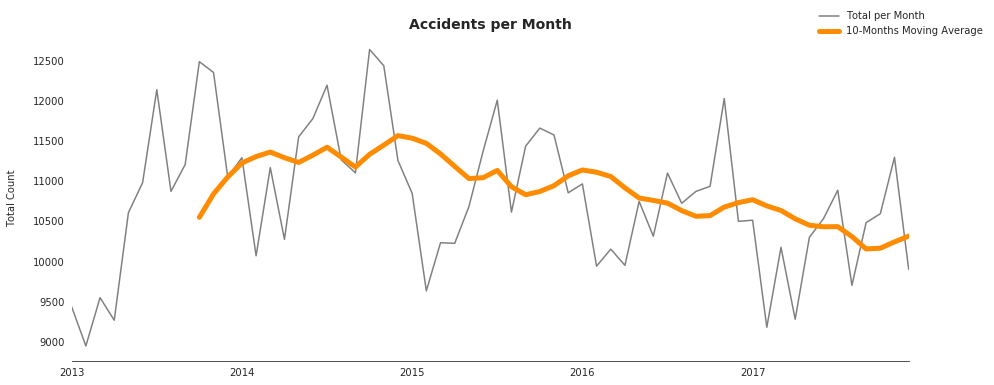

In [27]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

# beautify
ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

*Answer: The trend is decreasing!*

In [28]:
#accidents[['Date', 'Day_of_Week', 'Time']].head()

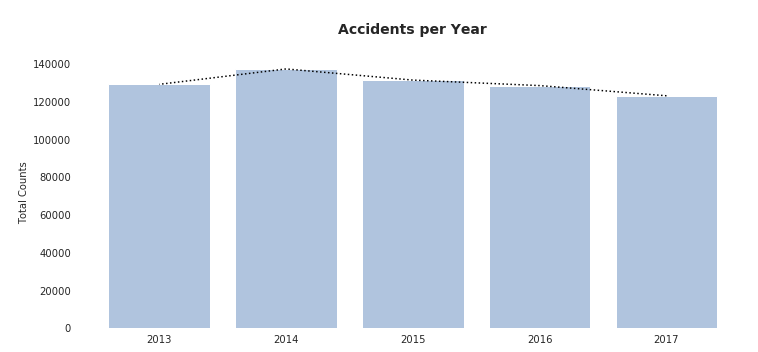

In [29]:
yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lightsteelblue')
ax.plot(yearly_count, linestyle=':', color='black')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

***Which weekdays are most likely to cause accidents?***

In [30]:
weekday_counts = pd.DataFrame(accidents.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
weekday_counts.head(2)

,Date,Count
0,2013-01-01,236
1,2013-01-02,252


In [31]:
# get weekday property
weekday = weekday_counts['Date'].dt.weekday_name
# group by 
weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages = weekday_averages.set_index('Weekday')
weekday_averages

,Average_Accidents
Weekday,
Friday,406.015326
Monday,354.219231
Saturday,322.938697
Sunday,272.950192
Thursday,377.839080
Tuesday,376.019157
Wednesday,374.727969


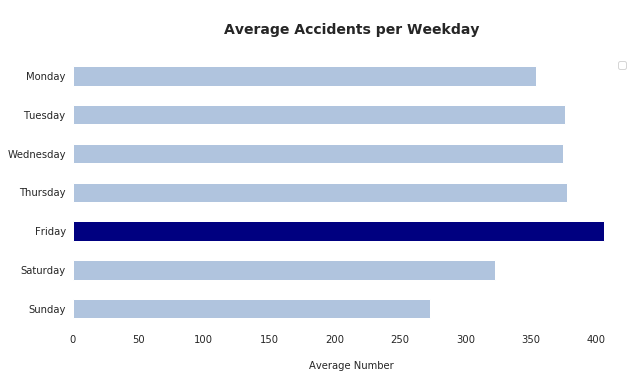

In [32]:
# reorder the weekdays beginning with Monday (backwards because of printing behavior!)
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 
        'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

# plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [33]:
# get datetime properties
year = accidents['Date'].dt.year
weekday = accidents['Date'].dt.weekday_name

In [34]:
# use datetime properties in groupby statement
accident_table = accidents.groupby([year, weekday]).size()

days = ['Monday', 'Tuesday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                                  .unstack('Weekday')\
                                    .reindex(columns=days)
accident_table

Weekday,Monday,Tuesday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,,
2013,18450,19716,19716,19073,19678,21420,16727,13832
2014,19835,20943,20943,20783,20413,22400,17732,14939
2015,18796,20144,20144,20071,20131,20899,16876,14227
2016,18067,18904,18904,19581,19658,21224,16694,14104
2017,16949,18434,18434,18296,18736,20027,16258,14138


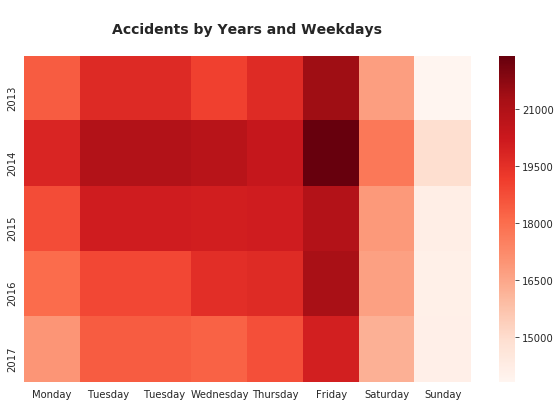

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

*Answer: Across all years, Sundays are the safest of all weekdays while Fridays are the most dangerous!*

In [36]:
#### by hour !!!

In [37]:
accidents['hour'] = accidents['Time'].str[0:2]
accidents.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2015-01-12,...,0,4,1,1,0,0,1,1,E01002825,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2015-01-12,...,0,1,1,1,0,0,1,1,E01002820,07


In [38]:
# groupby year (datetime property) and hour_column and calculate size
hourly_counts = pd.DataFrame(accidents.groupby([year, 'hour']).size())

# unstack the dataframe
hourly_counts = hourly_counts.unstack(level=-1)

# get rid of one level
hourly_counts.columns = hourly_counts.columns.droplevel()
hourly_counts

hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2013,1774,1287,1022,860,726,1146,2435,5692,9557,6652,...,7707,9787,10555,11615,9230,6533,4929,3668,3206,2410
2014,1878,1325,1010,862,759,1217,2670,6317,10149,6943,...,8230,10512,11102,12411,9848,7063,5024,3834,3251,2492
2015,1802,1325,1008,856,729,1179,2592,6194,9706,6320,...,7946,10120,10806,11924,9273,6892,4924,3777,3366,2491
2016,1841,1376,984,878,736,1171,2712,5911,9382,6175,...,7866,9705,10347,11365,9170,6780,4859,3862,3317,2518
2017,1831,1290,962,840,707,1212,2521,5596,8772,5835,...,7313,9495,9820,11005,8877,6540,4819,3768,3340,2564


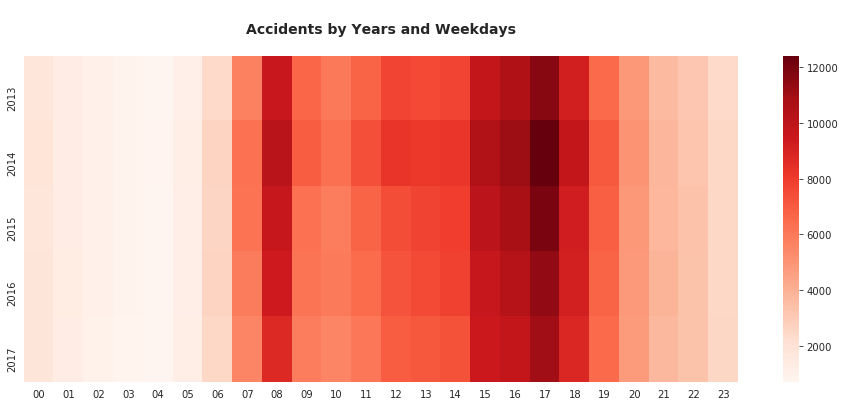

In [39]:
plt.figure(figsize=(16,6))
sns.heatmap(hourly_counts, cmap='Reds')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

*Answer: ????*

***How are accidents related to weather conditions?***

In [40]:
weather_table = accidents.set_index('Date').sort_index()\
                                           .groupby(['Weather_Conditions', pd.Grouper(freq='Y')])\
                                           .size()\
                                           .unstack('Weather_Conditions')
weather_table

Weather_Conditions,-1,1,2,3,4,5,6,7,8,9
Date,,,,,,,,,,
2013-12-31,NaN,104955.0,13174.0,1536.0,1698.0,1904.0,435.0,581.0,2261.0,2352.0
2014-12-31,NaN,112025.0,16027.0,185.0,1430.0,2096.0,51.0,711.0,2159.0,2361.0
2015-12-31,NaN,107549.0,14145.0,417.0,2160.0,1986.0,118.0,626.0,1831.0,2312.0
2016-12-31,9.0,105812.0,13219.0,260.0,1148.0,1221.0,56.0,719.0,2113.0,3675.0
2017-12-31,1.0,99229.0,13195.0,562.0,1148.0,1014.0,87.0,593.0,2554.0,4455.0


In [41]:
# change the index values to only the year
weather_table.index = pd.to_datetime(weather_table.index, format='%Y-%m-%d').year

# replace the weather conditions' values with explanation
weather_table.columns = ['Data Missing', 'Fine no high winds', 'Raining no high winds', 'Snowing no high winds',
                        'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist',
                        'Other', 'Unknown']
weather_table

,Data Missing,Fine no high winds,Raining no high winds,Snowing no high winds,Fine + high winds,Raining + high winds,Snowing + high winds,Fog or mist,Other,Unknown
Date,,,,,,,,,,
2013,NaN,104955.0,13174.0,1536.0,1698.0,1904.0,435.0,581.0,2261.0,2352.0
2014,NaN,112025.0,16027.0,185.0,1430.0,2096.0,51.0,711.0,2159.0,2361.0
2015,NaN,107549.0,14145.0,417.0,2160.0,1986.0,118.0,626.0,1831.0,2312.0
2016,9.0,105812.0,13219.0,260.0,1148.0,1221.0,56.0,719.0,2113.0,3675.0
2017,1.0,99229.0,13195.0,562.0,1148.0,1014.0,87.0,593.0,2554.0,4455.0


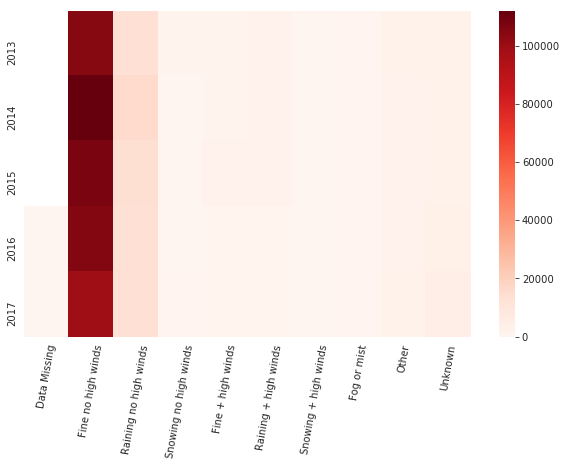

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(weather_table, cmap='Reds')

# rotate xticks for better readability
plt.xticks(rotation=80)
plt.ylabel('');

In [43]:
# bubble plot

*Answer: Fine weather without any special conditions causes by far most of the accidents!*

***What percentage of each type of accident severity do we have?***

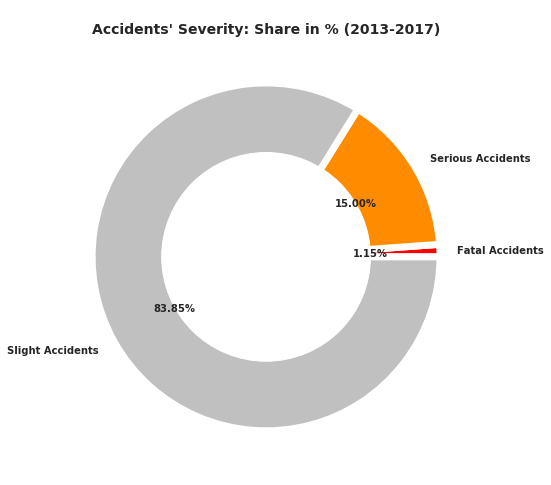

In [44]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()[1]
serious = accidents.Accident_Severity.value_counts()[2]
slight  = accidents.Accident_Severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccidents\' Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

In [45]:
### make pieplots for all speed limits!

In [46]:
accidents.Speed_limit.unique()

array([30., 50., 40., 20., 10., 70., 60.,  0.])

In [47]:
accidents.Speed_limit.nunique()

8

In [48]:
#accidents[(accidents['Accident_Severity']==3) & (accidents['Speed_limit']==30.)].shape

In [49]:
test_df = accidents.groupby([ 'Speed_limit', 'Accident_Severity']).size().reset_index()
test_df.columns = ['Speed_limit', 'Accident_Severity', 'Count']

test_df.Speed_limit = test_df.Speed_limit.astype('int')
test_df.Accident_Severity = test_df.Accident_Severity.map({1:'Fatal Accidents', 
                                                           2:'Serious Accidents', 
                                                           3:'Slight Accidents'})

test_df = test_df[(test_df.Speed_limit != 0) & (test_df.Speed_limit != 10)]
#test_df

In [50]:
#test_df.Count.iloc[0]

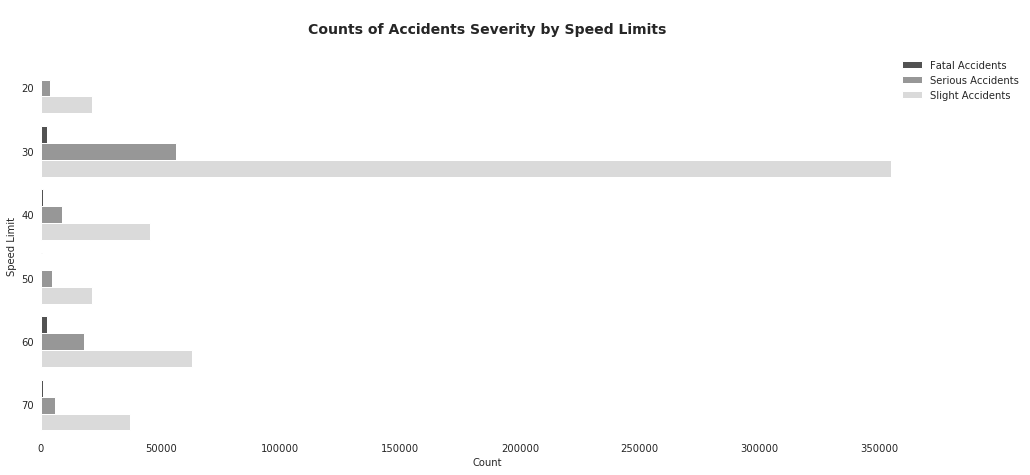

In [51]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(16, 7))
sns.barplot(y='Speed_limit', x='Count', hue='Accident_Severity', data=test_df, orient='h', palette='Greys_r')
ax.set_title('\nCounts of Accidents Severity by Speed Limits\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Speed Limit')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

***How have fatalities developed over years?***

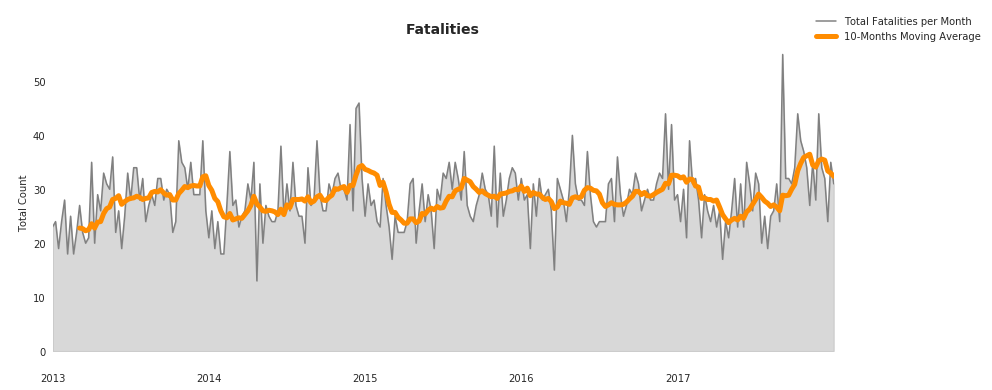

In [52]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']==1
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='grey', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='grey', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

***Is the share of fatal accidents increasing or decreasing?***

In [53]:
sub_df = accidents[['Date', 'Accident_Index', 'Accident_Severity']]

# pull out the year
year = sub_df['Date'].dt.year
week = sub_df['Date'].dt.week

# groupby year and severities
count_of_fatalities = sub_df.set_index('Date').groupby([pd.Grouper(freq='W'), 'Accident_Severity']).size()

# build a nice table
fatalities_table = count_of_fatalities.rename_axis(['Week', 'Accident_Severity'])\
                                      .unstack('Accident_Severity')\
                                      .rename(columns={1:'fatal', 2:'serious', 3:'slight'})
fatalities_table.head()

Accident_Severity,fatal,serious,slight
Week,,,
2013-01-06,23,234,1198
2013-01-13,24,324,2086
2013-01-20,19,231,1890
2013-01-27,24,206,1662
2013-02-03,28,340,2117


In [54]:
fatalities_table['sum'] = fatalities_table.sum(axis=1)
fatalities_table = fatalities_table.join(fatalities_table.div(fatalities_table['sum'], axis=0), rsuffix='_percentage')
fatalities_table.head()

Accident_Severity,fatal,serious,slight,sum,fatal_percentage,serious_percentage,slight_percentage,sum_percentage
Week,,,,,,,,
2013-01-06,23,234,1198,1455,0.015808,0.160825,0.823368,1.0
2013-01-13,24,324,2086,2434,0.009860,0.133114,0.857025,1.0
2013-01-20,19,231,1890,2140,0.008879,0.107944,0.883178,1.0
2013-01-27,24,206,1662,1892,0.012685,0.108879,0.878436,1.0
2013-02-03,28,340,2117,2485,0.011268,0.136821,0.851911,1.0


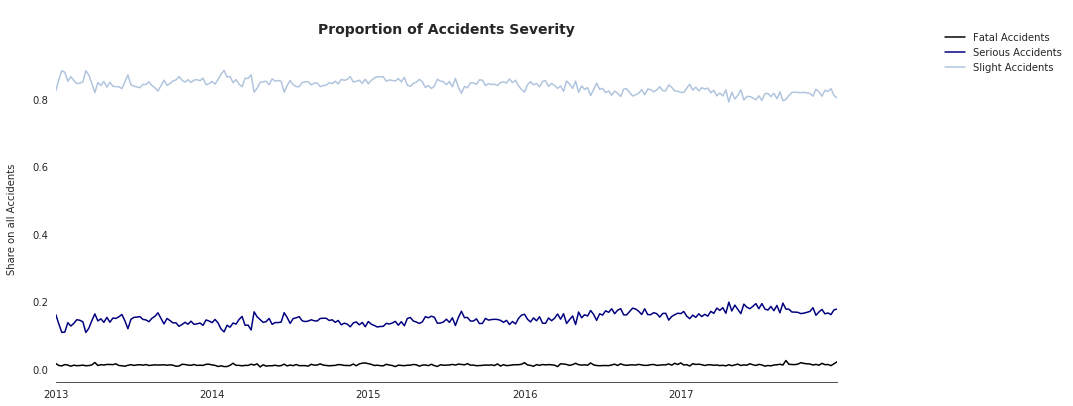

In [55]:
# prepare data
sub_df = fatalities_table[['fatal_percentage', 'serious_percentage', 'slight_percentage']]

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))
colors=['black', 'navy', 'lightsteelblue']

# plot
sub_df.plot(color=colors, ax=ax)
ax.set_title('\nProportion of Accidents Severity\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Share on all Accidents\n', xlabel='')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=False);

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.2. Main Characteristics of Casualties 
<a id='3.2. Main Characteristics of Casualties'></a>

In [56]:
#casualties.describe().T

***What is the most frequent casualties' age?***

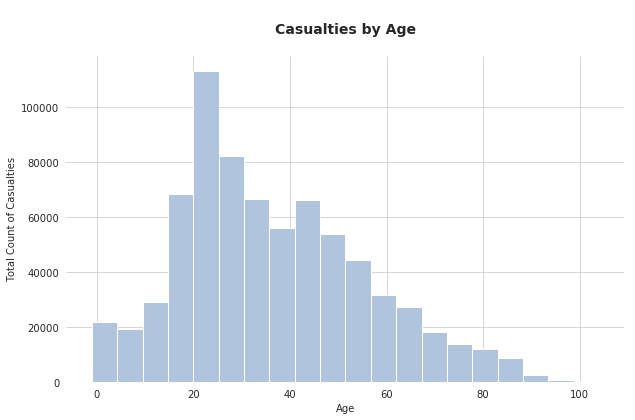

In [57]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
casualties.Age_of_Casualty.hist(bins=20, ax=ax, color='lightsteelblue')
ax.set_title('\nCasualties by Age\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Age', ylabel='Total Count of Casualties')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.3. Main Characteristics of Vehicles 
<a id='3.3. Main Characteristics of Vehicles'></a>

In [58]:
#vehicles.describe().T

***What age and sex have most accident cars' drivers?***

In [59]:
# create a new dataframe
drivers = vehicles.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == 3)]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']

# rename the values to be more convenient for the reader resp. viewer
drivers['Sex_of_Driver'] = drivers['Sex_of_Driver'].map({1: 'male', 2: 'female'})
drivers['Age_Band_of_Driver'] = drivers['Age_Band_of_Driver'].map({1: '0 - 5', 2: '6 - 10', 3: '11 - 15',
                                                                   4: '16 - 20', 5: '21 - 25', 6: '26 - 35',
                                                                   7: '36 - 45', 8: '46 - 55', 9: '56 - 65',
                                                                   10: '66 - 75', 11: 'Over 75'})

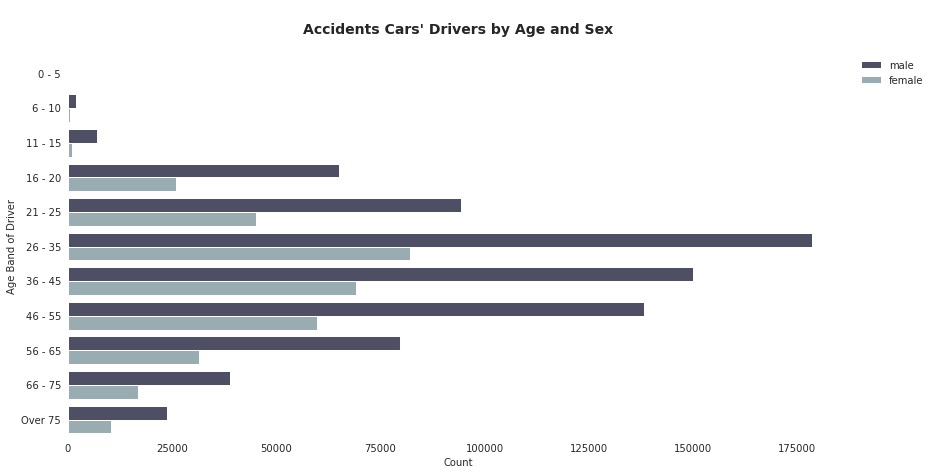

In [60]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='bone')
ax.set_title('\nAccidents Cars\' Drivers by Age and Sex\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);
#ax.set_axis_off();

Geo Data

In [74]:
# import shapely python package that allows to work with points, lines and polygons
from shapely.geometry import Point, Polygon

# import geopandas that allows to create a GeoDataFrame from a DataFrame
import geopandas as gpd

import contextily

In [75]:
# using shapefiles provided by https://geoportal.statistics.gov.uk/
geo_df = gpd.read_file('geo-data/Local_Authority_Districts_April_2019_Boundaries_UK_BFC/Local_Authority_Districts_April_2019_Boundaries_UK_BFC.shp')
print(geo_df.crs)
geo_df.head(2)

{'init': 'epsg:27700'}


,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676201,9.355951e+07,71707.162397,(POLYGON ((447213.8995000003 537036.1044999994...
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544701,5.388858e+07,43840.876046,(POLYGON ((448958.9007000001 521835.6954999994...


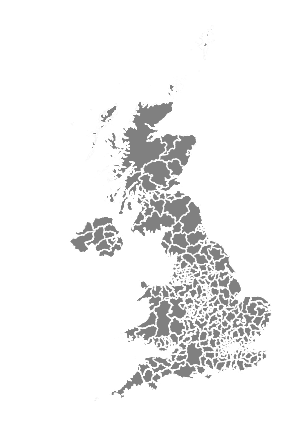

In [76]:
fig, ax = plt.subplots(figsize=(4,8))
geo_df.plot(ax=ax, color='grey')
ax.set_axis_off()
plt.show();

In [77]:
# create a tuple with lat and long and then create point geometry column from that tuple
accidents['geometry'] = accidents.apply(lambda x: Point((x.Longitude, x.Latitude)), axis=1)

crs = {'init':'epsg:27700'}
accidents_geo = gpd.GeoDataFrame(accidents, crs=crs, geometry=accidents.geometry)
print(accidents_geo.crs)
accidents_geo.head(2)

{'init': 'epsg:27700'}


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,hour,geometry
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2015-01-12,...,4,1,1,0,0,1,1,E01002825,18,POINT (-0.198465 51.505538)
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2015-01-12,...,1,1,1,0,0,1,1,E01002820,07,POINT (-0.178838 51.491836)


In [78]:
# https://epsg.io/27700

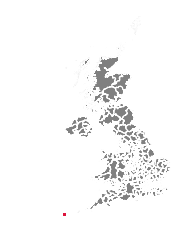

In [80]:
fig, ax = plt.subplots()

geo_df.plot(ax=ax, color='grey')
accidents_geo.plot(markersize=0.5, alpha=0.6, ax=ax, color='crimson')

ax.set_axis_off()
plt.show();

In [ ]:
geo_df.unary_union.plot()

HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
http://tile.stamen.com/terrain/24/8388605/8388584.png

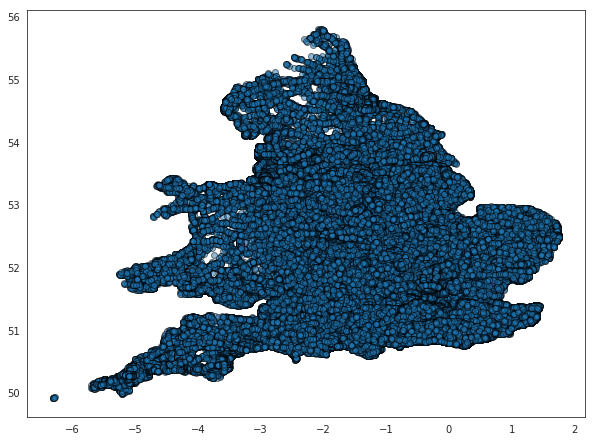

In [82]:
ax = accidents_geo.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
contextily.add_basemap(ax)
ax.set_axis_off()

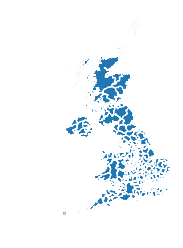

In [73]:
ax = geo_df.plot()
accidents_geo.plot(column='Accident_Severity', ax=ax, markersize=0.5, legend=True)
ax.set_axis_off()
plt.show();

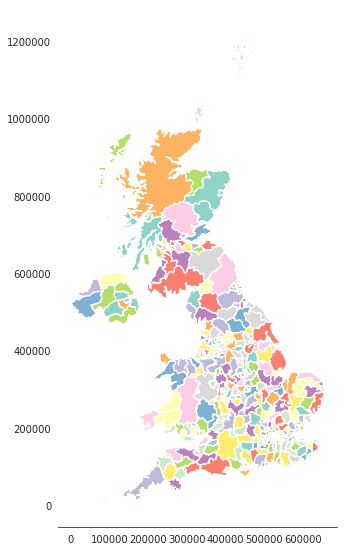

In [77]:
#leg_kwds={'title':'UK Districts', 
          #'loc': 'upper left', 
          #'bbox_to_anchor':(1, 1.03), 
          #'ncol':3}
#geo_df.plot(figsize=(5,10), column='lad19nm', cmap='Set3', legend=True, legend_kwds=leg_kwds)
geo_df.plot(figsize=(5,10), column='lad19nm', cmap='Set3', legend=False)
sns.despine(top=True, right=True, left=True, bottom=False);

In [78]:
#geo_df.plot(figsize=(5,10), column='lad19nm', legend=False)
#plt.scatter(accidents.Longitude, accidents.Latitude)
#plt.title('Accidents per Region')
#sns.despine(top=True, right=True, left=True, bottom=False);

Now we have a geo dataframe with the districts and next...

In [80]:
# create a tuple with lat and long and then create point geometry column from that tuple
accidents['geometry'] = accidents.apply(lambda x: Point((x.Longitude, x.Latitude)), axis=1)
#accidents.head(2)

# crs (=coordinate reference system) 4326 == units are decimal degrees --- squared
# crs (=coordinate reference system) 3857 == units are meters
# EPSG (=European Petroleum Survey Group)
crs = {'init':'epsg:3857'}
accidents_geo = gpd.GeoDataFrame(accidents, crs=crs, geometry=accidents.geometry)
#print(type(accidents_geo))
#accidents_geo.head(2)

KeyboardInterrupt: 

In [ ]:
# Spatial join
join_df = pd.merge(accidents, geo_df[['lad19nm', 'long', 'lat', 'geometry']], how='left',
                    left_on='Police_Force', right_on='lad19nm')
join_df.head()

In [ ]:
# Create permit_counts
permit_counts = permits_by_district.groupby(['district']).size()
print(permit_counts)

In [ ]:
###### to normalize the data
# Create an area column in council_districts
council_districts['area'] = council_districts.geometry.area
print(council_districts.head(2))

# Convert permit_counts to a DataFrame
permits_df = permit_counts.to_frame()
print(permits_df.head(2))

# Reset index and column names
permits_df.reset_index(inplace=True)
permits_df.columns = ['district', 'bldg_permits']
print(permits_df.head(2))

# Merge council_districts and permits_df: if df first --> result df ( id 
districts_and_permits = pd.merge(council_districts, permits_df, on='district')
print(districts_and_permits.head(2))

That's great work! You have created a column with the area in the council_districts Geo DataFrame and built a DataFrame from the permit_counts. You have merged all the information into a single GeoDataFrame. Next you will calculate the permits by area for each council district.

In [ ]:
# Create permit_density column in districts_and_permits
districts_and_permits['permit_density'] = districts_and_permits.apply(lambda row: row.bldg_permits / row.area, axis=1)

# Print the head of districts_and_permits
print(districts_and_permits.head())

In [ ]:
# Simple plot of building permit_density
districts_and_permits.plot(column = 'permit_density', legend = True);
plt.show();

# Polished choropleth of building permit_density
districts_and_permits.plot(column='permit_density', cmap='BuGn', edgecolor='black', legend=True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xticks(rotation='vertical')
plt.title('2017 Building Project Density by Council District')
plt.show();

In [ ]:
#### Folium choropleth of school density

# Center point and map for Nashville
nashville = [36.1636,-86.7823]
m = folium.Map(location=nashville, zoom_start=10)

# Define a choropleth layer for the map
m.choropleth(
    geo_data=districts_with_counts,
    name='geometry',
    data=districts_with_counts,
    columns=['district', 'school_density'],
    key_on='feature.properties.district',
    fill_color='YlGn',
    fill_opacity=0.75,
    line_opacity=0.5,
    legend_name='Schools per km squared by School District'
   )

# Add layer control and display
folium.LayerControl().add_to(m)
display(m)

In [ ]:
# Folium choropleth with markers and popups

# Create center column for the centroid of each district
districts_and_permits['center'] = districts_and_permits.geometry.centroid

# Build markers and popups
for row in districts_and_permits.iterrows():
    row_values = row[1]
    center_point = row_values['center']
    location = [center_point.y, center_point.x]
    popup = ('Council District: ' + str(row_values['district']) + 
             ';  ' + 'permits issued: ' + str(row_values['bldg_permits']))
    marker = folium.Marker(location=location, popup=popup)
    marker.add_to(m)

In [ ]:
# count number of accidents per district
accident_counts = accidents_geo.groupby(['Police_Force']).size().sort_values(ascending=False)

# convert pandas series to a dataframe ...
accident_counts_df = accident_counts.to_frame()
# ... reset the index ...
accident_counts_df.reset_index(inplace=True)
# ... and add names for the columns
accident_counts_df.columns = ['District', 'Accident_Count']

accident_counts_df.head()

In [ ]:
# merge the accident counts with full geo dataframe
districts_with_accidents = pd.merge(accidents_geo, accident_counts_df, left_on='Police_Force', right_on='District').drop
districts_with_accidents

In [ ]:
# plot map and add grouped counts as bubble 
#ax = accidents_geo.plot(color = 'lightgreen')
# Add a plot
#accidents[['Police_Force', 'Accident_Index']]\
                        #.groupby('Police_Force')\
                            #.agg('count').sort_values('Accident_Index', ascending = False)\
                                #.plot(ax=ax, column= 'Accident_Index', legend = True)

In [ ]:
#downtown_center = accidents_geo.geometry.centroid
#ax = accidents_geo.plot(color = 'lightgreen')
#downtown_center.plot(ax = ax, color = 'black')
#plt.xticks(rotation = 45)

In [ ]:
import folium
# construct a map centered at the Eiffel Tower
#eiffel_tower = folium.Map(location = [48.8583736,2.2922926], zoom_start = 12)
# display the map
#display(eiffel_tower)

uk = folium.Map(location=[56, 0.7], zoom_start=5.2)

# Draw our neighborhood: Urban Residents
#folium.GeoJson(accidents_geo.geometry).add_to(uk)
# Display the map
display(uk)

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 4. Modeling the Data
<a id='4. Modeling the Data'></a>

#### 4.1. Preprocessing the Data 
<a id='4.1. Preprocessing the Data'></a>

Geospatial Data:
- http://geopandas.org/geometric_manipulations.html
- http://geologyandpython.com/ml-interpolation-method.html
- http://geologyandpython.com/ml-interpolation-method.html
- https://pysal.readthedocs.io/en/v1.12.0/library/spreg/ols.html
- https://chrisalbon.com/python/data_wrangling/geocoding_and_reverse_geocoding/
- https://geocoder.readthedocs.io/api.html#reverse-geocoding

In [118]:
accidents.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2015-01-12,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2015-01-12,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2015-01-12,...,0,1,4,2,2,0,0,1,1,E01002833


In [122]:
import pysal
from spreg import ols
from spreg import ml_error
from spreg import ml_lag

In [74]:
# combine the accidents with the vehicles table
accidents_vehicles = pd.merge(accidents, vehicles, on='Accident_Index')
df_model = accidents_vehicles[['Coordinates', 'Day_of_Week', 'Road_Type', 'Speed_limit', 
                         'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
                         'Urban_or_Rural_Area']]
df_model.shape

(1129207, 8)

In [75]:
df_model.isna().sum()

Coordinates                0
Day_of_Week                0
Road_Type                  0
Speed_limit                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
dtype: int64

In [76]:
# drop missing values
df = df_model.dropna()
#df.info()

In [77]:
df['Road_Type'].value_counts()

6    828286
3    180895
1     80281
2     20334
7     12448
9      6963
Name: Road_Type, dtype: int64

In [78]:
# drop ???
#df.drop(df[(df['Sex_of_Driver']==3)  | (df['Sex_of_Driver']==-1) | \
           #(df['Engine_Capacity_(CC)']==-1) | (df['Engine_Capacity_(CC)'] < 100) | \
           #(df['Junction_Location']==-1)].index, axis=0, inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129207 entries, 0 to 1129206
Data columns (total 8 columns):
Coordinates                1129207 non-null object
Day_of_Week                1129207 non-null int64
Road_Type                  1129207 non-null int64
Speed_limit                1129207 non-null float64
Light_Conditions           1129207 non-null int64
Weather_Conditions         1129207 non-null int64
Road_Surface_Conditions    1129207 non-null int64
Urban_or_Rural_Area        1129207 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 77.5+ MB


In [81]:
# cast categorical features to their proper data format
for col in ['Day_of_Week', 'Road_Type', 'Speed_limit', 'Light_Conditions', 
            'Weather_Conditions','Road_Surface_Conditions', 'Urban_or_Rural_Area']:
    df[col] = df[col].astype('category')

In [ ]:
#df.info()

In [66]:
# define our features 
features = df.drop(['coordinates'], axis=1)

# define our target
target = df[['coordinates']]

# create dummy variables
features = pd.get_dummies(features)

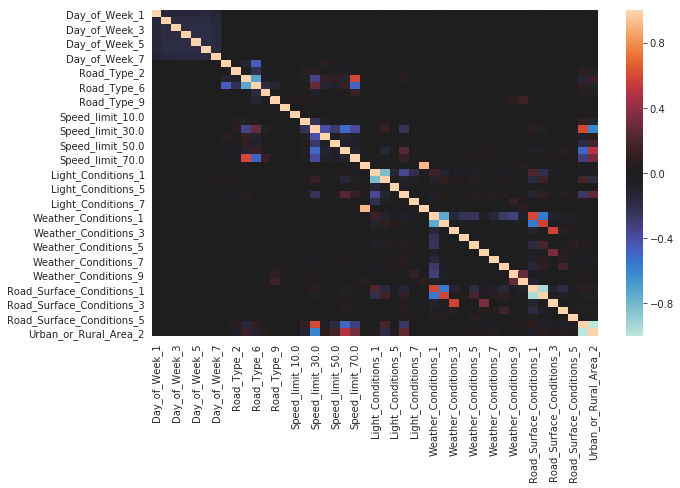

In [67]:
# use heatmap to check for intercorrelation between variables
plt.figure(figsize=(10,6))
sns.heatmap(features.corr(), center=0);

In [68]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# import Grid Search
from sklearn.model_selection import GridSearchCV

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [69]:
# split our data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [70]:
# scale our data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 4.2. Random Forest Classifier 
<a id='4.2. Random Forest Classifier'></a>

In [71]:
# instantiate the plain classifier
forest = RandomForestClassifier()

# train
forest.fit(X_train, y_train)

# predict
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest = classification_report(y_test, test_preds)

print("Plain Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

# store accuracy score in a new dataframe
#score_forest = ['Plain Random Forest', train_accuracy_forest, test_accuracy_forest]
#models = pd.DataFrame([score_forest])

ValueError: Unknown label type: 'unknown'

# create grid              
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [2, 3, 4]}

# instantiate grid search
forest_grid_search = GridSearchCV(forest, param_grid, cv=3)

# train
forest_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(forest_grid_search.best_params_)

In [ ]:
# instantiate random forest with the best found parameters
forest = RandomForestClassifier(n_estimators=80, criterion='gini', max_features=7, 
                                      max_depth=10, min_samples_split=4)

# train
forest.fit(X_train, y_train)

# predict
train_preds = forest.predict(X_train)
test_preds  = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest  = accuracy_score(y_test, test_preds)
report_forest = classification_report(y_test, test_preds)

print("Tuned Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

Tuned Random Forest
-------------------------
Training Accuracy: 43.54%
Test Accuracy:     43.17%


*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 4.3. XGBoost Classifier 
<a id='4.3. XGBoost Classifier'></a>

In [ ]:
# instantiate xgboost
booster = xgb.XGBClassifier()

# train
booster.fit(X_train, y_train)

# predict
train_preds = booster.predict(X_train)
test_preds  = booster.predict(X_test)

# evaluate
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster  = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("Tuned XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

# create grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate grid search
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

# instantiate xgboost with best found parameters
booster = xgb.XGBClassifier(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                            max_depth=6, n_estimators=100, random_state=4)

# predict
train_preds = booster.predict(X_train)
test_preds  = booster.predict(X_test)

# evaluate
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster  = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("Tuned XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")